# **Predicting Drug Response and Disease Classification Using Genomic and Protein Data**

***Author's Disclaimer note:*** 

*This is a coursework practical material designed to explain the workflow with high level explanation of the Machine Learning models and their applications. The data used is only a synthetic representation of real world data. The real world project would have more complex structure and need better analysis and engineering for application.*

*Contact for related queries: kharinirt237@gmail.com*
*LinkedIn: https://www.linkedin.com/in/komalharini-tiwari/*

# 1. Data Understanding and EDA (Exploratory Data Analysis):
### 1. Import Libraries: Start by importing the necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load Data:

In [2]:
# Load the dataset
data = pd.read_csv('bioinformatics_ml_project.csv')
# data = pd.read_csv('bioinformatics_ml_project.csv',index_col='Patient_ID')

# Display the first few rows of the dataset
data.head()

,Patient_ID,Age,Weight,Gene1_Expression,Gene2_Expression,Gene3_Expression,Protein_Descriptor1,Protein_Descriptor2,Drug_Response,Disease_Status,Drug_Dosage
0,1,45.0,93.0,NaN,9.445006,14.14,0.49,1.10,Ineffective,Cancer,144.160454
1,2,79.0,93.0,7.984583,6.053021,7.74,0.47,1.27,Effective,Healthy,178.819155
2,3,70.0,78.0,9.740995,2.121154,9.22,0.46,1.44,Ineffective,Cancer,198.972020
3,4,28.0,NaN,2.856589,7.097806,12.30,0.35,0.90,Ineffective,Cancer,134.791813
4,5,51.0,91.0,9.182268,9.219273,8.06,0.52,1.10,Ineffective,NaN,73.414387


### 3. Basic Data Summary:
- Check the shape of the dataset (number of rows and columns).
- Check for null values.
- Get summary statistics.

In [3]:
# Check the number of rows and columns
print(data.shape)

(100, 11)


In [4]:
# Check for missing values
data.isnull().sum()

Patient_ID              0
Age                    10
Weight                  8
Gene1_Expression        6
Gene2_Expression        0
Gene3_Expression        0
Protein_Descriptor1     0
Protein_Descriptor2     0
Drug_Response           1
Disease_Status          1
Drug_Dosage            12
dtype: int64

In [5]:
# Get summary statistics
data.describe()

,Patient_ID,Age,Weight,Gene1_Expression,Gene2_Expression,Gene3_Expression,Protein_Descriptor1,Protein_Descriptor2,Drug_Dosage
count,100.000000,90.000000,92.000000,94.000000,100.000000,100.00000,100.000000,100.000000,88.000000
mean,50.500000,52.833333,75.141304,5.677361,5.165436,9.88840,0.461100,1.142300,134.321637
std,29.011492,16.176867,15.680590,2.573667,2.747411,2.81757,0.087339,0.197202,43.191471
min,1.000000,21.000000,50.000000,1.108113,1.003591,5.09000,0.300000,0.810000,50.351946
25%,25.750000,41.000000,59.000000,3.527560,2.369348,7.42000,0.400000,0.977500,97.918708
50%,50.500000,52.000000,76.000000,5.585566,5.421362,9.68000,0.460000,1.150000,143.877681
75%,75.250000,68.000000,90.000000,7.906689,7.139885,12.11250,0.550000,1.300000,170.771276
max,100.000000,79.000000,99.000000,9.991787,9.980401,14.89000,0.600000,1.480000,198.972020


In [6]:
# Display the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           100 non-null    int64  
 1   Age                  90 non-null     float64
 2   Weight               92 non-null     float64
 3   Gene1_Expression     94 non-null     float64
 4   Gene2_Expression     100 non-null    float64
 5   Gene3_Expression     100 non-null    float64
 6   Protein_Descriptor1  100 non-null    float64
 7   Protein_Descriptor2  100 non-null    float64
 8   Drug_Response        99 non-null     object 
 9   Disease_Status       99 non-null     object 
 10  Drug_Dosage          88 non-null     float64
dtypes: float64(8), int64(1), object(2)
memory usage: 8.7+ KB


### 4. Visualize Data:
- Plot distributions of features such as age, weight, and gene expressions.
- Use pair plots to see relationships between variables.

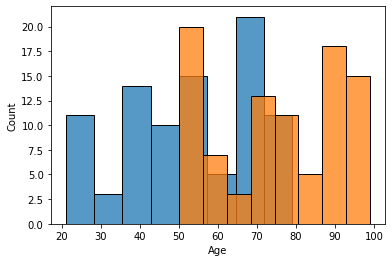

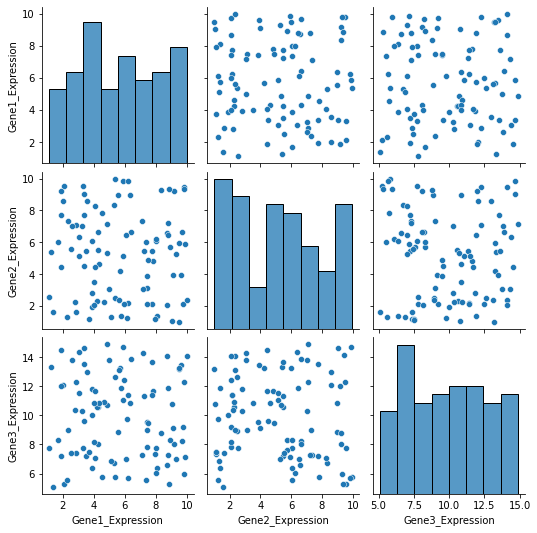

In [7]:
# Distribution of age and weight
sns.histplot(data['Age'])
sns.histplot(data['Weight'])

# Visualizing gene expression
sns.pairplot(data[['Gene1_Expression', 'Gene2_Expression', 'Gene3_Expression']])
plt.show()

<AxesSubplot:xlabel='Disease_Status'>

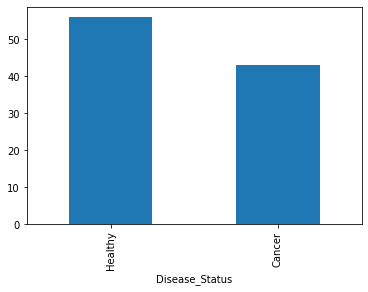

In [8]:
# Visualize distribution
data['Disease_Status'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Drug_Response'>

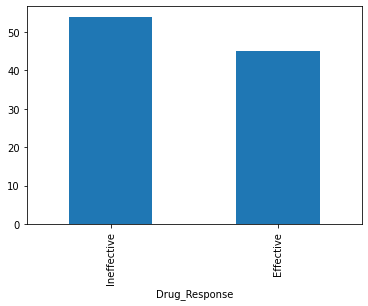

In [9]:
# Visualize distribution
data['Drug_Response'].value_counts().plot(kind='bar')

# 2. Data Preprocessing:

### 1. Handling Missing Values:
- If there are missing values, decide how to handle them (drop, fill, etc.).

In [10]:
# Filling missing values for numeric columns (if necessary)
data.fillna(data.mean(numeric_only=True), inplace=True)

# Check for missing values
data.isnull().sum()

Patient_ID             0
Age                    0
Weight                 0
Gene1_Expression       0
Gene2_Expression       0
Gene3_Expression       0
Protein_Descriptor1    0
Protein_Descriptor2    0
Drug_Response          1
Disease_Status         1
Drug_Dosage            0
dtype: int64

In [11]:
# Filling missing values for categorical columns with the mode
for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Check for missing values
data.isnull().sum()

Patient_ID             0
Age                    0
Weight                 0
Gene1_Expression       0
Gene2_Expression       0
Gene3_Expression       0
Protein_Descriptor1    0
Protein_Descriptor2    0
Drug_Response          0
Disease_Status         0
Drug_Dosage            0
dtype: int64

### 2. Encoding Categorical Variables:
- Convert Disease_Status and Drug_Response into numerical values (e.g., 1 for "Cancer", 0 for "Healthy").

In [12]:
# Before encoding
data[['Disease_Status','Drug_Response']].head()

,Disease_Status,Drug_Response
0,Cancer,Ineffective
1,Healthy,Effective
2,Cancer,Ineffective
3,Cancer,Ineffective
4,Healthy,Ineffective


In [13]:
# Encode categorical variables
data['Disease_Status'] = data['Disease_Status'].map({'Cancer': 1, 'Healthy': 0})
data['Drug_Response'] = data['Drug_Response'].map({'Effective': 1, 'Ineffective': 0})

- The `map()` function is case-sensitive and expects exact matches for the strings provided. 
- This is not possible when there are more number of different categorical values. 
- That is when `LabelEncoder()` can be used so that mentioning exact strings is not needed.

In [12]:
# Another way:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoder = LabelEncoder()
data['Drug_Response'] = label_encoder.fit_transform(data['Drug_Response'])
data['Disease_Status'] = label_encoder.fit_transform(data['Disease_Status'])


In [14]:
# After encoding
data[['Disease_Status','Drug_Response']].head()

,Disease_Status,Drug_Response
0,1,0
1,0,1
2,1,0
3,1,0
4,0,0


<AxesSubplot:xlabel='Disease_Status'>

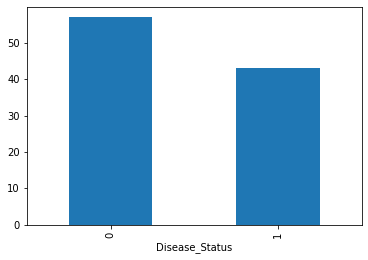

In [15]:
# Visualize distribution
data['Disease_Status'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Drug_Response'>

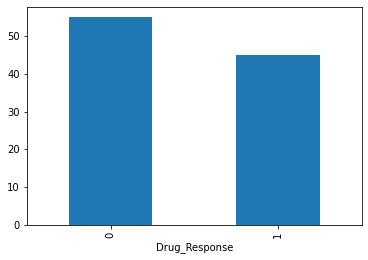

In [16]:
# Visualize distribution
data['Drug_Response'].value_counts().plot(kind='bar')

### 3. Feature Scaling:
- Normalize or standardize numeric data such as gene expression and protein descriptors.

In [17]:
from sklearn.preprocessing import StandardScaler

# Define the features to be scaled
features = ['Age', 'Weight', 'Gene1_Expression', 'Gene2_Expression', 'Gene3_Expression', 'Protein_Descriptor1', 'Protein_Descriptor2']

# Before scaling
data[features].describe()

,Age,Weight,Gene1_Expression,Gene2_Expression,Gene3_Expression,Protein_Descriptor1,Protein_Descriptor2
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,52.833333,75.141304,5.677361,5.165436,9.88840,0.461100,1.142300
std,15.338109,15.033687,2.494458,2.747411,2.81757,0.087339,0.197202
min,21.000000,50.000000,1.108113,1.003591,5.09000,0.300000,0.810000
25%,41.750000,60.750000,3.685126,2.369348,7.42000,0.400000,0.977500
50%,52.833333,75.141304,5.677361,5.421362,9.68000,0.460000,1.150000
75%,66.250000,89.250000,7.758585,7.139885,12.11250,0.550000,1.300000
max,79.000000,99.000000,9.991787,9.980401,14.89000,0.600000,1.480000


In [18]:
# Standardize the data
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

In [19]:
# After scaling
data[features].describe()

,Age,Weight,Gene1_Expression,Gene2_Expression,Gene3_Expression,Protein_Descriptor1,Protein_Descriptor2
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,3.264056e-16,5.462297e-16,-1.698641e-16,-4.529710e-16,-2.764455e-16,-7.771561e-17,-4.990452e-16
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-2.085896e+00,-1.680756e+00,-1.840988e+00,-1.522455e+00,-1.711608e+00,-1.853833e+00,-1.693564e+00
25%,-7.262414e-01,-9.620930e-01,-8.026881e-01,-1.022844e+00,-8.804877e-01,-7.030986e-01,-8.399017e-01
50%,4.655869e-16,9.500295e-16,0.000000e+00,9.362099e-02,-7.433707e-02,-1.265808e-02,3.924298e-02
75%,8.791343e-01,9.431999e-01,8.385421e-01,7.222786e-01,7.933449e-01,1.023003e+00,8.037166e-01
max,1.714585e+00,1.595011e+00,1.738318e+00,1.761375e+00,1.784090e+00,1.598370e+00,1.721085e+00


# 3. Model Building & Interpretation:

## Model 1: Linear Regression for Drug Dosage Prediction
### 1. Define Features and Target:

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define features (Age, Weight, Disease_Status) and target (Drug_Dosage)
X = data[['Age', 'Weight', 'Disease_Status']]
y = data['Drug_Dosage']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2. Train the Model:

In [21]:
# Train Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

In [22]:
for i in range(0,len(y_pred)):
    print(y_test.reset_index(drop='index')[i], y_pred[i])

95.50964659 134.433778055828
164.1027607 109.69458930168094
76.92198328 155.38431032239853
134.32163696056818 122.23394967415113
134.32163696056818 136.05265051889663
198.7630012 159.2101350498936
171.5516685 136.01784372088474
105.9557773 138.09321622218894
185.8180447 143.6861140840454
144.1604544 125.90087941730039
72.50990772 140.44520223481518
130.2352039 131.15926311989014
134.32163696056818 128.60299088328833
90.42105507 132.42936195742814
143.6087937 121.13023739774725
73.41438668 124.13435262958373
171.0016897 153.12200392821222
191.9298058 154.24571718971936
158.423463 124.3001187858097
179.0525793 137.5023677278561


### 3. Model Evaluation
- For Regression Models:
    - Evaluate using metrics like **Mean Squared Error (MSE), R-squared.**
- For Classification Models:
    - Evaluate using metrics like **Accuracy, Precision, Recall, F1-Score, and Confusion Matrix.**
- For Clustering Models:
    - Evaluate using **Silhouette Score** or **Within-Cluster Sum of Squares (WCSS).**

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1543.552338424623
R-squared: 0.015031450248899847


### 4. Interpretation: 
- #### Mean Squared Error (MSE):
    - **Lower MSE** is better. It represents the average squared difference between the actual and predicted values. 
    - If MSE is close to 0, it indicates that your model's predictions are very close to the actual values.
    - The range of MSE depends on the scale of your target variable. 
    - However, in your case, an MSE of **1543.55** indicates that there is quite a bit of error in your predictions.
- #### R-squared (R²):
    - The **R-squared value (R²)** measures how well your model explains the variance in the target variable.
    - R-squared values range from 0 to 1, with higher values indicating better model performance.
        - **R² = 1** means the model explains all the variance perfectly.
        - **R² = 0** means the model explains none of the variance (similar to predicting the mean of the target).
        - **R² < 0** means the model is performing worse than a horizontal line.
    - Your **R² = 0.015** means that the model explains only about 1.5% of the variance, which is quite low and indicates underperformance.

### 5. Conclusion: 
To improve your linear regression model:

- Look for non-linear relationships (use polynomial features).
- Use regularization techniques like Ridge or Lasso.
- Remove outliers or irrelevant features.
- Normalize your features if necessary.
- Ensure your target variable is clean.

## **Model 2:** Decision Tree for Disease Classification

### 1. Define Features and Target:

In [24]:
# Print columns
data.columns

Index(['Patient_ID', 'Age', 'Weight', 'Gene1_Expression', 'Gene2_Expression',
       'Gene3_Expression', 'Protein_Descriptor1', 'Protein_Descriptor2',
       'Drug_Response', 'Disease_Status', 'Drug_Dosage'],
      dtype='object')

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Features: physical information, gene expressions and protein descriptors
X = data[['Age','Weight','Gene1_Expression', 'Gene2_Expression', 'Gene3_Expression', 'Protein_Descriptor1', 'Protein_Descriptor2']]
y = data['Disease_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2. Train the Model:

In [26]:
# Train Decision Tree
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

# Predict
y_pred = tree_clf.predict(X_test)

### 3. Evaluate:

In [27]:
from sklearn.metrics import accuracy_score

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.75


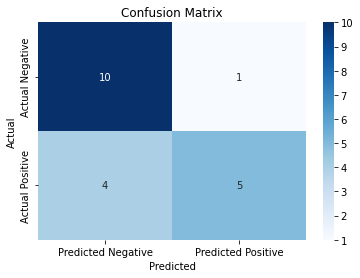

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 4. Interpretation:
- An accuracy of 0.75 means that 75% of the predictions made by the model are correct.
- Accuracy alone might not be sufficient for evaluating your model’s performance, especially if your dataset is imbalanced or if you are more concerned about false positives or false negatives. In bioinformatics and drug discovery, predicting false negatives (i.e., classifying a diseased patient as healthy) could be more critical than false positives.
- Other evaluation metrics such as **precision, recall, F1-score, or ROC-AUC score** are often more informative for evaluating classification models.

### 5. Conclusion:
- The accuracy of 75% means that 75% of the model's predictions are correct, which could be decent in some cases, but you should investigate whether the dataset is balanced and explore additional evaluation metrics to ensure that the model is performing well across different classes. 
- Additionally, applying techniques like **hyperparameter tuning and feature engineering** can help improve accuracy.

## **Model 3:** Random Forest for Drug Response Prediction

### 1. Define Features and Target:

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Features: protein descriptors and gene expressions
X = data[['Age','Weight','Protein_Descriptor1', 'Protein_Descriptor2', 'Gene1_Expression', 'Gene2_Expression','Drug_Dosage']]
y = data['Drug_Response']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2. Train the Model:

In [30]:
# Train Random Forest
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train,)

# Predict
y_pred = rf_clf.predict(X_test)


### 3. Evaluate:

In [31]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6


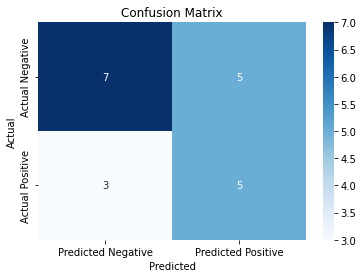

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 4. Interpretation:
- An accuracy of 60% indicates that the model correctly predicted the outcome for 60% of the samples in your test set.
- 40% of the predictions were incorrect.

### 5. Conclusion:
- An accuracy of 60% for the Random Forest model indicates that the model’s performance is quite low. 
- This could be due to various factors like **overfitting, poor feature selection, or imbalanced data**. 
- By **tuning hyperparameters, using cross-validation, handling class imbalances, and considering feature importance**, you can improve the model’s accuracy and overall performance.
- Other metrics:
    - **Precision:** How many of the predicted positives are actual positives.
    - **Recall:** How many of the actual positives were correctly predicted.
    - **F1-Score:** A balance between precision and recall.
    - **ROC-AUC:** A metric that evaluates how well the model distinguishes between classes.

# 4. Overall Conclusion:

After applying each model, you will have:

- **Predicted *Drug Dosage*** using **Linear Regression.**
- ***Disease* Classification** using **Decision Trees.**
- ***Drug Response* Prediction** using **Random Forest.**

You can visualize the results, evaluate each model using metrics such as accuracy, MSE, and R-squared, and draw insights from the data.

This simplified project integrates EDA, preprocessing, and modeling using various machine learning techniques in the context of bioinformatics. You can easily extend it by adding more features, fine-tuning the models, and improving feature engineering.